In [9]:
import numpy as np

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def relu(x):
    return np.maximun(x, 0)

In [4]:
def dictionary_to_vector(parameters):
    """
    Roll all our parameters dictionary into a single vector satisfying our specific required shape.
    """
    keys = []
    count = 0
    for key in ['W1', 'b1', 'W2', 'b2', 'W3', 'b3']:
        new_vector = np.reshape(parameters[key], (-1, 1))
        keys = keys + [key]*new_vector.shape[0]
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        
        count += 1
        
    return theta, keys

In [5]:
def vector_to_dictionary(theta):
    """
    Unroll all our parameters dictionary from a single vector satisfying our specific required shape.
    """
    parameters = {}
    parameters["W1"] = theta[:20].reshape((5,4))
    parameters["b1"] = theta[20:25].reshape((5,1))
    parameters["W2"] = theta[25:40].reshape((3,5))
    parameters["b2"] = theta[40:43].reshape((3,1))
    parameters["W3"] = theta[43:46].reshape((1,3))
    parameters["b3"] = theta[46:47].reshape((1,1))

    return parameters

In [6]:
def gradients_to_vector(gradients):
    """
    Roll all our gradients dictionary into a single vector satisfying our specific required shape.
    """
    
    count = 0
    for key in ["dW1", "db1", "dW2", "db2", "dW3", "db3"]:
        # flatten parameter
        new_vector = np.reshape(gradients[key], (-1,1))
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1

    return theta

# Gradient checking

In [7]:
def forward_propagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    # Cost
    cost = -1/m * np.nansum(np.multiply(Y, np.log(A3)) + np.multiply(1 - Y, np.log(1 - A3)))
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost, cache

In [8]:
def backward_propagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1/m * np.dot(dZ3, A2.T)
    db3 = 1/m * np.sum(dZ3, axis=1, keepdims=True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int(A1 > 0))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
            "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
            "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return grads

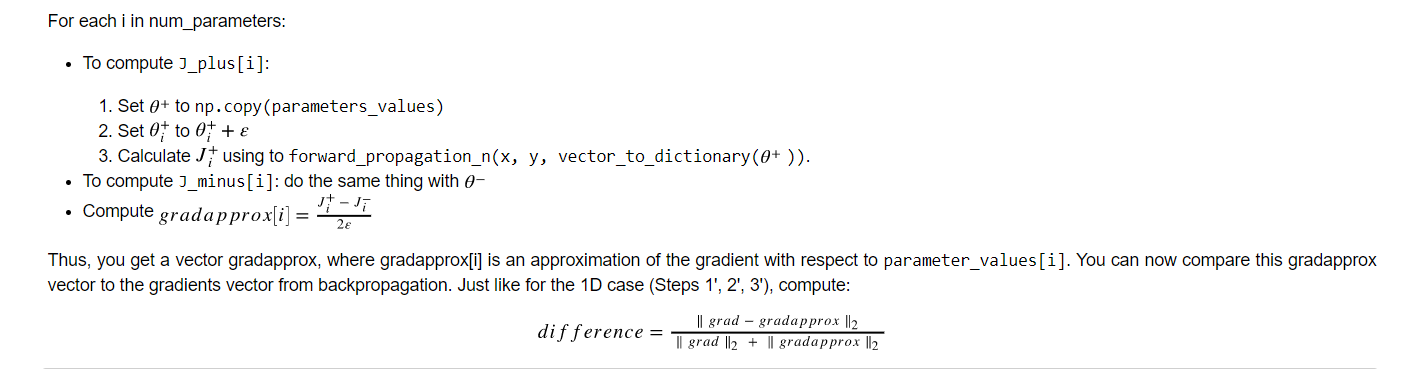

In [10]:
def gradient_check(parameters, grads, X, Y, epsilon = 1e-7):
    """
    Checks if backward_propagation computes correctly the gradient of the cost output by forward_propagation
    
    Returns:
    difference -- difference between the approximated gradient and the backward propagation gradient
    """
    # Set-up variables
    parameters_value, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(grads)
    num_parameters = parameters_value.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        thetaplus =  np.copy(parameters_values)
        thetaplus[i][0] = thetaplus[i][0] + epsilon
        J_plus[i], _ = forward_propagation(X, Y, vector_to_dictionary(thetaplus))
        
        thetaminus =  np.copy(parameters_values)
        thetaminus[i][0] = thetaminus[i][0] - epsilon
        J_minus[i], _ = forward_propagation(X, Y, vector_to_dictionary(thetaminus))
        
        gradapprox[i] = (J_plus[i] - J_minus[i])/(2*epsilon)
        
    numerator = np.linalg.norm(gradapprox - grad)                                        
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)                                     
    difference = numerator/denominator 
    
    if difference > 1e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference